# SVM. A first Approach with Scikit-learn

I'll write a quick and dirty implementation of SVM on Iris Dataset using `scikit-learn` and `keras` modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import datasets

## Data Loading and Visualization

In [39]:
# import the Iris dataset and split into feature and target array
iris = datasets.load_iris()
# Create two different dataframes for feature (X) and target (y) 
X = pd.DataFrame(iris.data,columns=iris.feature_names)
Y = pd.DataFrame(iris.target,columns=["Species"])

df = X.join(Y) 

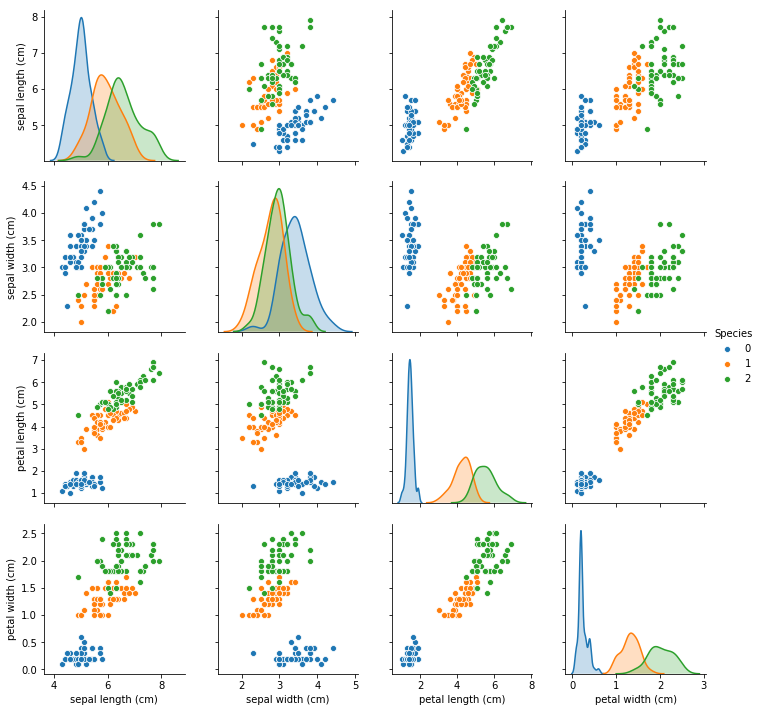

In [42]:
# Create a pairplot to visualize the similarities and especially difference between the species
sns.pairplot(df, hue="Species", vars=iris.feature_names)

The iris dataset is well know. However, with pairplot one could observe that there is a clear clustering between species. 

[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

## Data Preparation

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.30)

## Model Definition

In [47]:
from sklearn.svm import SVC
model=SVC()

## Model Fit

In [48]:
model.fit(x_train, y_train)

/home/mario/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Model Predict

In [49]:
pred=model.predict(x_test)

## Model Evaluation

In [50]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Module for plotting confusion matrix:
def confusion_matrix_plot (y_test, pred):
    df_cm = pd.DataFrame(confusion_matrix(y_test,pred))
    #plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

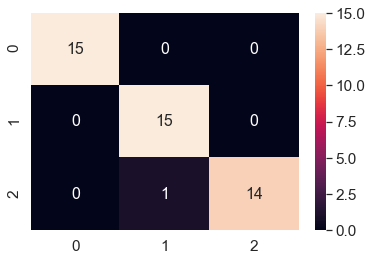

In [57]:
confusion_matrix_plot (y_test, pred)

In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

